In [15]:
!pip install pandas numpy scikit-learn pydotplus matplotlib

     |████████████████████████████████| 10.3 MB 394 kB/s eta 0:00:01    |██████████████████▎             | 5.9 MB 394 kB/s eta 0:00:12
     |████████████████████████████████| 1.2 MB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 16.3 MB/s eta 0:00:01


In [2]:
import os 
import glob
import pandas as pd



import numpy as np
import urllib
from sklearn import tree
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.externals.six import StringIO 
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus

import matplotlib

%matplotlib inline
from matplotlib import pyplot as plt

In [20]:
#carregar dataset concatenado
combined_csv = pd.read_csv('combined_data.csv').drop(['Unnamed: 0'], axis = 1)

In [6]:
#usado para concaternar os datasets
'''
os.chdir("/home/camila/workspace/ml-ids")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)'''

['Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv', 'Monday-WorkingHours.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv']


In [7]:
#usado para concaternar os datasets
'''
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')'''

In [68]:
combined_csv = combined_csv.rename(columns=str.lower)

In [69]:
combined_csv.columns = combined_csv.columns.str.lstrip()

In [70]:
combined_csv.columns = combined_csv.columns.str.replace(' ','_')

In [21]:
combined_csv.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [39]:
combined_csv.isnull().any().any

<bound method NDFrame._add_numeric_operations.<locals>.any of destination_port               False
flow_duration                  False
total_fwd_packets              False
total_backward_packets         False
total_length_of_fwd_packets    False
                               ...  
idle_mean                      False
idle_std                       False
idle_max                       False
idle_min                       False
label                          False
Length: 79, dtype: bool>

In [22]:
combined_csv = combined_csv.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
combined_csv = combined_csv.dropna()
# Double check these are all gone
combined_csv.isnull().any().any()

False

In [23]:
combined_csv['label'].value_counts()


BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [24]:
combined_csv = combined_csv.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
combined_csv = combined_csv.dropna()

In [26]:
combined_csv.isnull().any().any() #retirar

False

In [27]:
#removing unicode text
combined_csv["label"] =  combined_csv.label.str.replace('[^\x00-\x7F]','')
#duplicate whitespace
combined_csv["label"] = combined_csv.label.replace('\s+', ' ', regex=True)

<ipython-input-27-ef26279a02b8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_csv["label"] =  combined_csv.label.str.replace('[^\x00-\x7F]','')


In [28]:
combined_csv['label'].value_counts()

BENIGN                    2271320
DoS Hulk                   230124
PortScan                   158804
DDoS                       128025
DoS GoldenEye               10293
FTP-Patator                  7935
SSH-Patator                  5897
DoS slowloris                5796
DoS Slowhttptest             5499
Bot                          1956
Web Attack Brute Force       1507
Web Attack XSS                652
Name: label, dtype: int64

In [29]:
combined_csv['network_flow'] = np.where(combined_csv['label'] == 'BENIGN', 0, 1)

In [30]:
# Proposed Groupings
attack_description = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Web Attack Brute Force': 'web_attack', 
                'Web Attack XSS': 'web_attack'}
# Create grouped label column
combined_csv['network_flow_description'] = combined_csv['label'].map(lambda x: attack_description[x])
combined_csv['network_flow_description'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: network_flow_description, dtype: int64

Text(0.5, 1.0, 'Ungruped Network Flow Types')

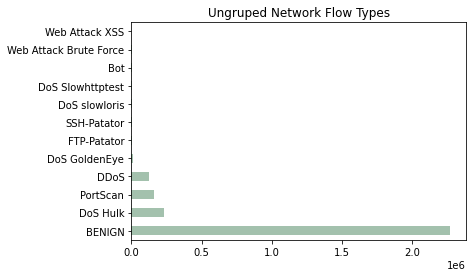

In [32]:
train_attacks = combined_csv['label'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Ungruped Network Flow Types')

Text(0.5, 1.0, 'Network Flow Types (bad and good grouped)')

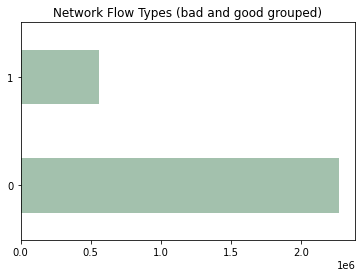

In [19]:
network_flow_counts = combined_csv['network_flow'].value_counts()
network_flow_counts.plot(kind='barh', color='#a3c1ad')
plt.title('Network Flow Types (bad and good grouped)')